## ML data manipulation case

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

## seaborn is expansion of matplotlib
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
## Data: 
### https://artyudinsitemedia.nyc3.cdn.digitaloceanspaces.com/carprices.csv

In [6]:
## Used car prices
df = pd.read_csv("https://artyudinsitemedia.nyc3.cdn.digitaloceanspaces.com/carprices.csv")

In [7]:
df.head()

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


In [8]:
df.rename(columns = {"Age(yrs)":"Age", "Sell Price($)":"Price"}, inplace = True)

In [9]:
df

,Mileage,Age,Price
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


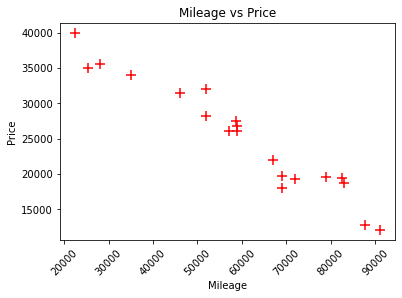

In [12]:
x_axis = df["Mileage"]
y_axis = df["Price"]

#plt.figure(figsize=(12,6))
plt.scatter(x_axis, y_axis, c="red", s=100, marker="+")

plt.title("Mileage vs Price")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.xticks(rotation=45)

plt.show()

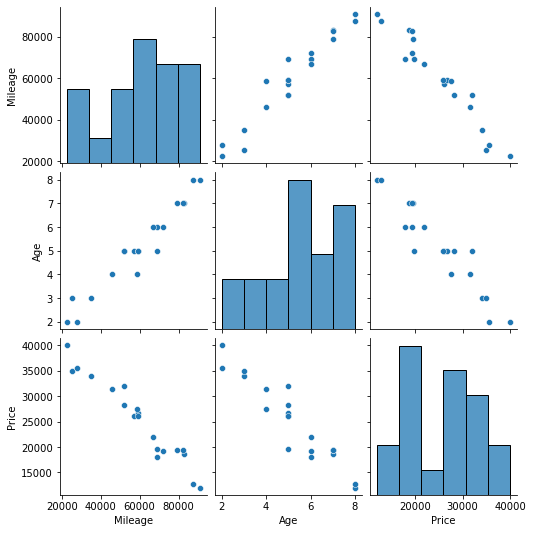

In [13]:
sns.pairplot(data=df)

In [14]:
# y = m1 * Age + m2 * Mileage + b
X = df[['Mileage', 'Age']]
y = df["Price"]

## Train/test split
### Default 75%/25%, try 80%/20%

In [22]:
## Returns 4 subsets, X into 2, y into2, 
## Output orders
## random_state, shuffle x times, and stop
X_train, X_test, y_train, y_test = \
train_test_split(X,y, test_size=0.2)

In [23]:
X_train

,Mileage,Age
4,46000,4
19,52000,5
17,69000,5
6,52000,5
18,87600,8
13,58780,4
15,25400,3
16,28000,2
2,57000,5
5,59000,5


In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train, y_train)

LinearRegression()

In [27]:
model.score(X_test, y_test)

0.9410598470737658

In [28]:
y_test

14    19400
9     22000
3     40000
10    18700
Name: Price, dtype: int64

In [30]:
predicted = pd.DataFrame()
predicted["Actual"] = y_test.values
predicted["Predicted"] = model.predict(X_test)

In [31]:
predicted

,Actual,Predicted
0,19400,16244.921666
1,22000,22046.965174
2,40000,39009.532349
3,18700,16046.361910


In [33]:
X_test.reset_index(drop=True, inplace=True)

In [34]:
pd.concat([X_test, predicted], axis=1)

,Mileage,Age,Actual,Predicted
0,82450,7,19400,16244.921666
1,67000,6,22000,22046.965174
2,22500,2,40000,39009.532349
3,83000,7,18700,16046.361910


In [35]:
## What if we use random_state, will result change?

In [38]:
random_st = []
scores = []

# generate multiple train/test data
for i in range(1, 100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    model = LinearRegression()
    model.fit(X_train, y_train)
    random_st.append(i)
    scores.append(model.score(X_test, y_test))


(0.7, 0.98)

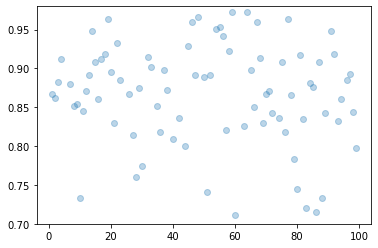

In [43]:
plt.scatter(random_st, scores, alpha=0.3)
plt.ylim(0.70, 0.98)

(0.7, 0.98)

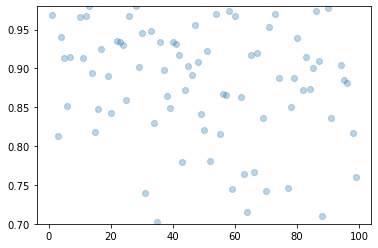

In [44]:
random_st = []
scores = []

# generate multiple train/test data
for i in range(1, 100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = LinearRegression()
    model.fit(X_train, y_train)
    random_st.append(i)
    scores.append(model.score(X_test, y_test))

plt.scatter(random_st, scores, alpha=0.3)
plt.ylim(0.70, 0.98)